I =  18782129.82214883 


T =  24.395499961529353 


ksi =  0.14384139128260232


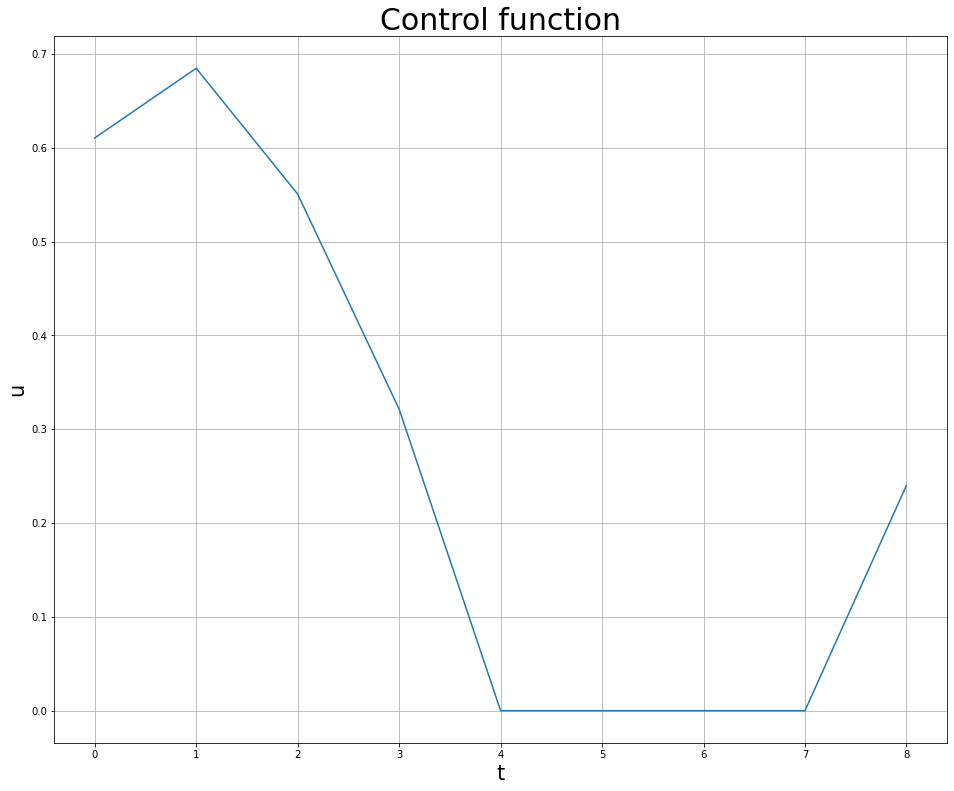

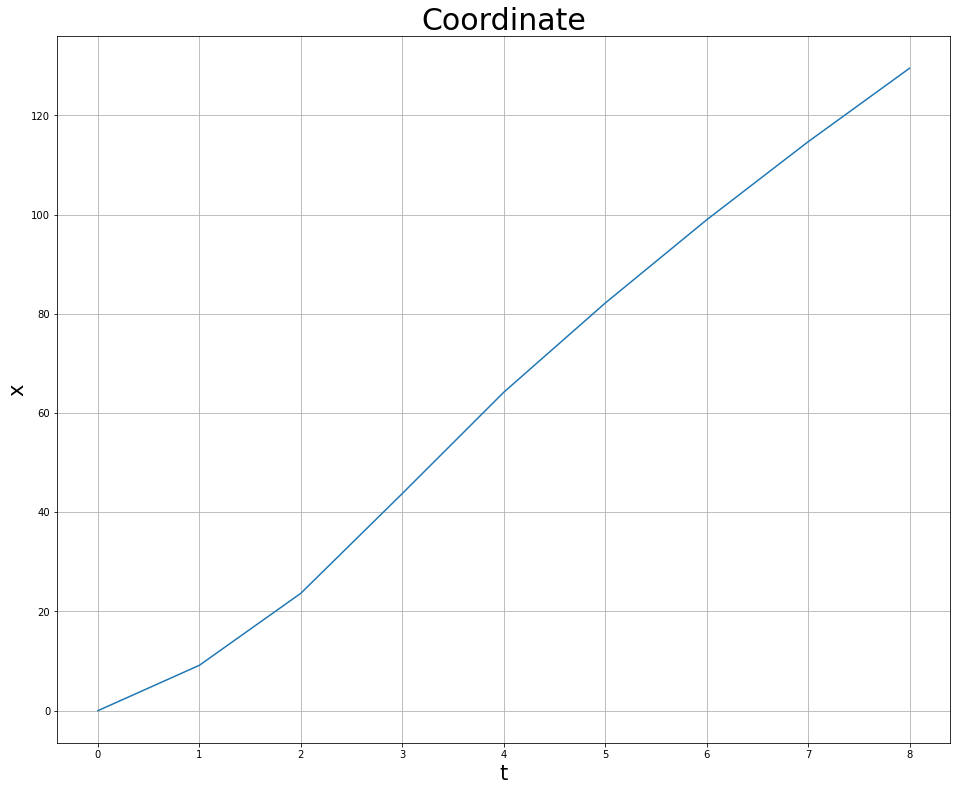

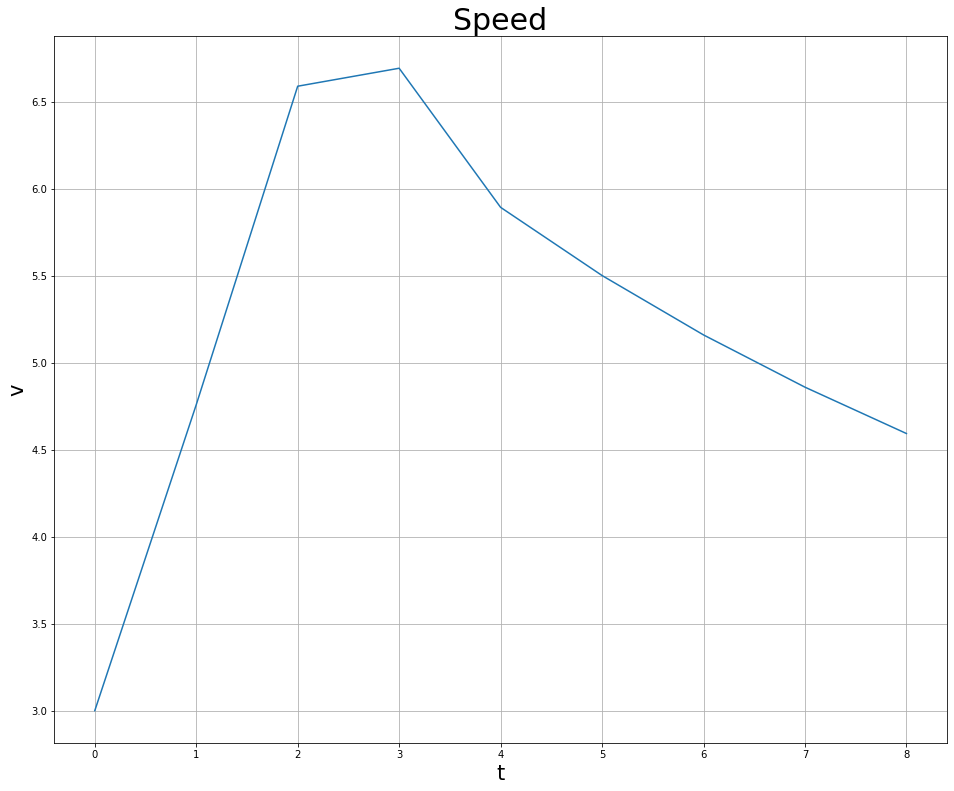

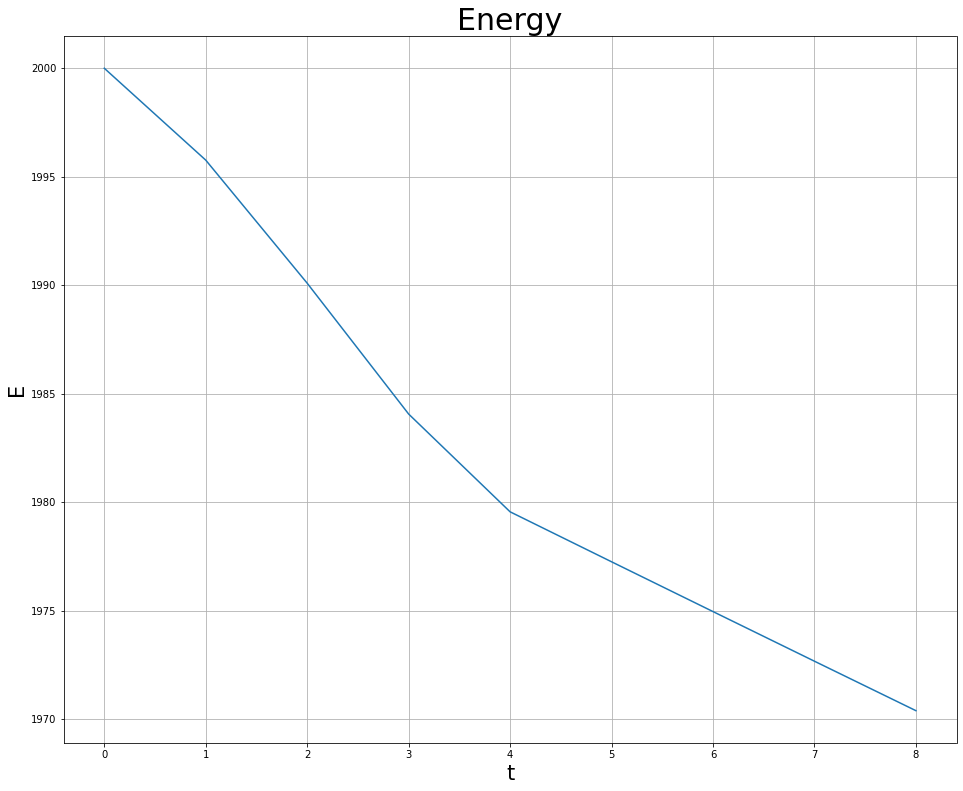

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

T = 10;
q = 10;

T_0 = 212;

D = 1500; #метров
E_0 = 2000;
v_0 = 3;
nu = 3;
gamma = 1/900;

del_t = T/q;
del_tau = T_0/q;

u = np.array(range(q-1), float);
x = np.array(range(q-1), float);
v = np.array(range(q-1), float);
E = np.array(range(q-1),float);
t = np.array(range(q-1), float);

u1 = np.array(range(q-1), float);
x1 = np.array(range(q-1), float);
v1 = np.array(range(q-1), float);
E1 = np.array(range(q-1), float);

p1 = np.array(range(q), float);
p2 = np.array(range(q), float);
p3 = np.array(range(q), float);
p4 = np.array(range(q), float);

alpha = 0.01;
beta = 1;
mu = random.randint(0,1);
lamda = random.randint(0,1);
    
#начальное управление
def U_i():
    for i in range(q-1):
        u[i]= np.random.random();
    return u

#построение v_i
def V_i(u,ksi):
    v[0] = v_0;
    for i in range(q-2):
        if (v[i]<=6):
            v[i+1] = v[i] + ksi * del_tau * (u[i] - 0.0037 * pow(v[i],2));
        elif (v[i]>6):
            v[i+1] = v[i] + ksi * del_tau * (u[i] - (0.6 * (v[i] - 6) + 0.0037 * pow(v[i],2)));
    return v;
            
#построение x_i
def X_i(v,ksi):
    x[0] = 0;
    for i in range(q-2):
            x[i+1] = x[i] + ksi * del_tau * v[i];
    return x
                
#построение E_i
def E_i(u,v,ksi):
    E[0] = E_0;
    for i in range(q-2):
        E[i+1] = E[i] + del_tau * ksi * (gamma * (0.65 * E[0] - E[i]) - (u[i] * v[i])/nu);
    return E
        
#построение t_i
def t_i(ksi):
    t[0] = 0;
    for i in range(q-2):
        t[i+1] = t[i] + ksi * del_tau;
    return t
        
#целевая функция
def I(E,x,ksi):
    I_sum = 0;
    for i in range(q-1):
        I_sum = I_sum + pow(max(-E[i],0),2) + pow(max(E[i] - E[0],0),2);
        
    I_sum = ksi * T_0 + M_k * pow((D - x[q-2]),2) + N_k * del_tau * ksi * I_sum;
    return I_sum;
        
#расчёт pj_i  
def Pj_i(E,x,u,v,ksi):
    p4[q-1] = -1;
    p3[q-1] = 0;
    p2[q-1] = 0;
    p1[q-1] = 2 * M_k * (D - x[q-2]);
    
    for i in range(q-1,-1):
        p4[i] = p4[i+1];
        
        if ((E[i]<0)and(E[i]>E[0])):
            p3[i] = p3[i+1] - gamma * p3[i+1] * ksi * del_tau - 2 * N_k * ksi * del_tau * (-1 + 1);
        elif ((E[i]<0)and(E[i]<=E[0])):
            p3[i] = p3[i+1] - gamma * p3[i+1] * ksi * del_tau - 2 * N_k * ksi * del_tau * (-1 + 0);
        elif ((E[i]>=0)and(E[i]>E[0])):
            p3[i] = p3[i+1] - gamma * p3[i+1] * ksi * del_tau - 2 * N_k * ksi * del_tau * (0 + 1);
        elif ((E[i]>=0)and(E[i]<=E[0])):
            p3[i] = p3[i+1] - gamma * p3[i+1] * ksi * del_tau - 2 * N_k * ksi * del_tau * (0 + 0);
        
        if (v[i]<=6):
            p2[i] = p1[i+1] * ksi * del_tau + p2[i+1] - (u[i]/nu) * p3[i+1] * ksi * del_tau - 0.0074 * v[i] * p2[i+1] * ksi * del_tau;
        elif (v[i]>6):
            p2[i] = p1[i+1] * ksi * del_tau + p2[i+1] - (u[i]/nu) * p3[i+1] * ksi * del_tau - (0.6 + 0.0074 * v[i]) * p2[i+1] * ksi * del_tau;
            
        p1[i] = p1[i+1];
    return p1,p2,p3,p4
    
#расчёт u_i
def U_next(p3,p2,v,ksi):
    for i in range(q-2):
        u[i] = u[i] - alpha * del_tau * ksi * (p3[i+1] * (v[i]/nu) - p2[i+1]);
        if (u[i] < 0): u[i] = 0;
        elif (u[i] > 1): u[i] = 1;
    return u

def ksi_next(p1,p2,p3,v,x,u,E,ksi):
    temp = 0
    temp1 = 0
    for i in range(q-1):
        temp += pow(max(-E[i],0),2) + pow(max(E[i]-E[0],0),2)
    for i in range(q-1):
        if (v[i]<=6):
            temp1 += v[i] * p1[i+1] + p2[i+1] * (u[i] - 0.0037 * pow(v[i],2)) + p3[i+1] * (gamma * (E[0] - E[i]) - (u[i]*v[i])/nu)
        if (v[i]>6):
            temp1 += v[i] * p1[i+1] + p2[i+1] * (u[i] - (0.6*(v[i] - 6) + 0.0037 * pow(v[i],2))) + p3[i+1] * (gamma * (E[0] - E[i]) - (u[i]*v[i])/nu)
       
    ksi = ksi - beta * del_tau * (T_0/del_tau + N_k * temp - temp1)
    if ksi<0: ksi = 0
    if ksi>1: ksi = 1
    return ksi

            
#НАЧАЛО ОСНОВНОЙ ПРОГРАММЫ
ksi = del_t/del_tau;
M_k = 10;
N_k = 10;

u = U_i();
#построение
v = V_i(u,ksi);
x = X_i(v,ksi);
E = E_i(u,v,ksi);
t = t_i(ksi);

sum1 = I(E,x,ksi);
u1 = u
x2 = x
E1 = E
v1 = v
ksi1 = ksi
sum2 = sum1

k=0

while ((abs(sum2-sum1)>=0.0001)or(k==0)):

    sum2 = sum1;
    u1 = u
    x2 = x
    E1 = E
    v1 = v
    ksi1 = ksi
    k+=1
    p1,p2,p3,p4 = Pj_i(E,x,u,v,ksi)
    k1 = 0
    while ((sum1>sum2)or(k1==0)):
        k1+=1
        sum2 = sum1;
        u1 = u
        x2 = x
        E1 = E
        v1 = v
        ksi1 = ksi
         
        ksi = ksi_next(p1,p2,p3,v,x,u,E,ksi)
        u = U_next(p3,p2,v,ksi)

        v = V_i(u,ksi);
        x = X_i(v,ksi);
        E = E_i(u,v,ksi);
        t = t_i(ksi);
        sum1 = I(E,x,ksi);
        alpha/=2
        beta/=2
    
print('I = ',sum2,'\n\n')
print('T = ',t[q-2],'\n\n')
print('ksi = ',ksi)
fig, ax = plt.subplots();
fig.set_figwidth(16)    #  ширина и
fig.set_figheight(13)    #  высота "Figure"
ax.plot(u)
ax.set_xlabel('t',fontsize = 21)
ax.set_ylabel('u',fontsize = 21)
ax.set_title('Control function',fontsize =30);
ax.grid()

fig1, ax1 = plt.subplots();
fig1.set_figwidth(16)    #  ширина и
fig1.set_figheight(13)    #  высота "Figure"
ax1.plot(x)
ax1.set_xlabel('t',fontsize = 21)
ax1.set_ylabel('x',fontsize = 21)
ax1.set_title('Coordinate',fontsize =30);
ax1.grid()

fig2, ax2 = plt.subplots();
fig2.set_figwidth(16)    #  ширина и
fig2.set_figheight(13)    #  высота "Figure"
ax2.plot(v)
ax2.set_xlabel('t',fontsize = 21)
ax2.set_ylabel('v',fontsize = 21)
ax2.set_title('Speed',fontsize =30);
ax2.grid()

fig3, ax3 = plt.subplots();
fig3.set_figwidth(16)    #  ширина и
fig3.set_figheight(13)    #  высота "Figure"
ax3.plot(E)
ax3.set_xlabel('t',fontsize = 21)
ax3.set_ylabel('E',fontsize = 21)
ax3.set_title('Energy',fontsize =30);
ax3.grid()
